In [3]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Matriz de confusión',cmap=plt.cm.Blues,ylabel="Resultado real",xlabel="Resultados de la predicción"):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada ")
    else:
        print('Matriz de confusión no normalizada')

    print(cm)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
    # para entregar el % de la matriz de confucion
    diagonal_index= 0
    total=0
    diagonal_total=0
    error_clasificacion_total=0
    for x in cm:
        index=0
        for y in x:
            if(diagonal_index==index):
                diagonal_total=diagonal_total+y
            else:
                error_clasificacion_total=error_clasificacion_total+y
            total=total+y
            index=index+1
        diagonal_index=diagonal_index+1
    acuaracy =  diagonal_total/total
    error_clasificacion=error_clasificacion_total/total
    print("Porcentaje total de los aciertos ")
    print (acuaracy)
    return acuaracy,error_clasificacion

<hr>

In [5]:
f = open('../final.csv','r')
final = pd.read_csv(f)
final.drop('Unnamed: 0', axis=1, inplace=True)
final.drop('Sales', axis=1, inplace=True)

In [6]:
predictors = final[["StoreType","Assortment","CompetitionDistance_int","Customers","Open_int"]] 
targets = final.Sales_rango

In [7]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.1)

In [8]:
temporal_y = tar_train.values
temporal_x = pred_train.values

In [9]:
labels=[0,1,2,3]
labels_string=["malo","regular","bueno","excelente"]

<hr><h1>Arboles de deciones </h1><hr>

In [10]:
clf = DecisionTreeClassifier( max_depth=7) #criterion='entropy'
clf = clf.fit(temporal_x, temporal_y)

Matriz de confusión no normalizada
[[22269  2923    48    33]
 [ 1113 18875  5169   359]
 [    2  5817 14425  5301]
 [    0   286  4502 20599]]


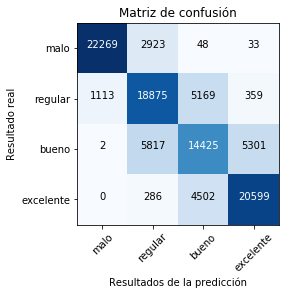

Porcentaje total de los aciertos 
0.74879326786


(0.74879326786012723, 0.25120673213987277)

In [11]:
y_true = tar_test.values
y_pred = clf.predict(pred_test)
cnf_matrix = confusion_matrix(y_true, y_pred, labels=labels)
plot_confusion_matrix(cnf_matrix, classes=labels_string, normalize=False)


Matriz de confusión normalizada 
[[  8.81137973e-01   1.15657025e-01   1.89926008e-03   1.30574130e-03]
 [  4.36196896e-02   7.39731933e-01   2.02578774e-01   1.40696034e-02]
 [  7.82932081e-05   2.27715796e-01   5.64689763e-01   2.07516148e-01]
 [  0.00000000e+00   1.12656084e-02   1.77334856e-01   8.11399535e-01]]


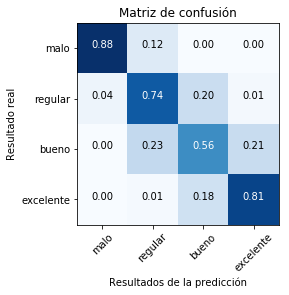

Porcentaje total de los aciertos 
0.749239801149


(0.74923980114857291, 0.25076019885142725)

In [12]:
plot_confusion_matrix(cnf_matrix, classes=labels_string, normalize=True)


In [13]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree.dot', feature_names=predictors.keys(),filled=True,rounded=True
                ,proportion=True,class_names=labels_string)

In [14]:
from PIL import Image
i = Image.open('tree.png','r') 

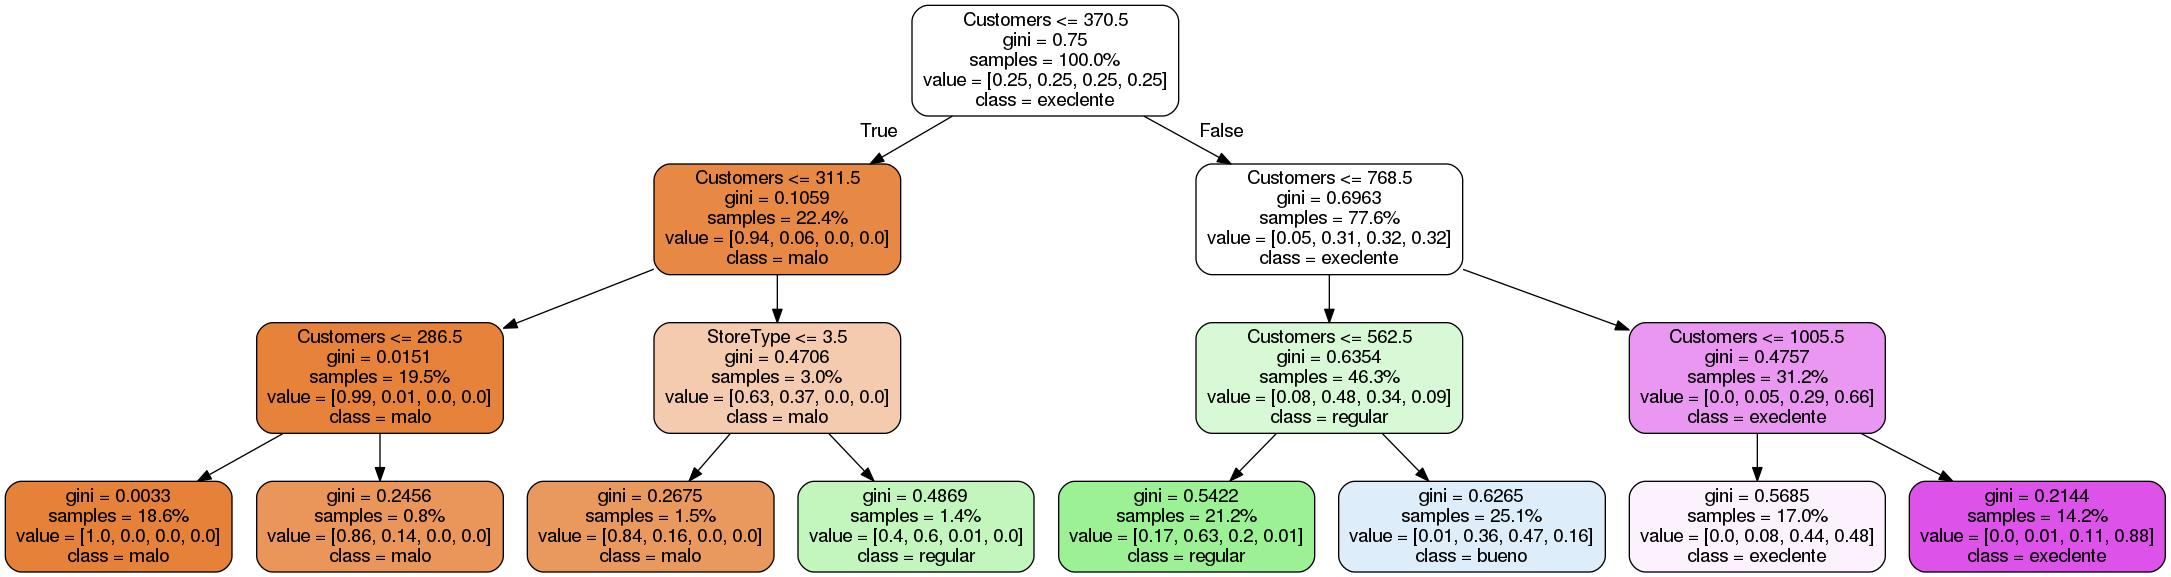

In [15]:
i #dot -Tpng tree.dot -o tree.png

<hr><h1>Random Forest</h1><hr>

In [16]:
clf=RandomForestClassifier(n_estimators=50)

In [ ]:
clf = clf.fit(temporal_x, temporal_y)

In [ ]:
y_true = tar_test.values
y_pred = clf.predict(pred_test)
cnf_matrix = confusion_matrix(y_true, y_pred, labels=labels)
plot_confusion_matrix(cnf_matrix, classes=labels_string, normalize=False)


<hr><h1>Redes neuronal</h1><hr>

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=50)

In [ ]:
clf = clf.fit(temporal_x, temporal_y)

In [ ]:
y_true = tar_test.values
y_pred = clf.predict(pred_test)
cnf_matrix = confusion_matrix(y_true, y_pred, labels=labels)
plot_confusion_matrix(cnf_matrix, classes=labels_string, normalize=False)

<hr><h1>Linear regression</h1><hr>

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf = clf.fit(temporal_x, temporal_y)
y_true = tar_test.values
y_pred = clf.predict(pred_test)

In [ ]:
y_pred2=[]
for x in y_pred:
    y_pred2.append(round(x))

In [ ]:
cnf_matrix = confusion_matrix(y_true, y_pred2, labels=labels)
plot_confusion_matrix(cnf_matrix, classes=labels_string, normalize=False)

<hr><h1>Bayes</h1><hr>

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf = clf.fit(temporal_x, temporal_y)
y_true = tar_test.values
y_pred = clf.predict(pred_test)

In [ ]:
cnf_matrix = confusion_matrix(y_true, y_pred, labels=labels)
plot_confusion_matrix(cnf_matrix, classes=labels_string, normalize=False)